# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames

import matplotlib.pyplot as plt
import seaborn as sns
# Pretty display for notebooks
%matplotlib inline
# plt.style.use('ggplot')

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"
    
# Set a random state for the training algorithms
RAN_STATE = 42

#Set size for figures
FIG_SIZE = (14,8)

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [4]:
# Display a description of the dataset
display(data.describe())
print("Number of missing values", data.isnull().sum().sum())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


('Number of missing values', 0)


This can be can also be visualized using a box plot.

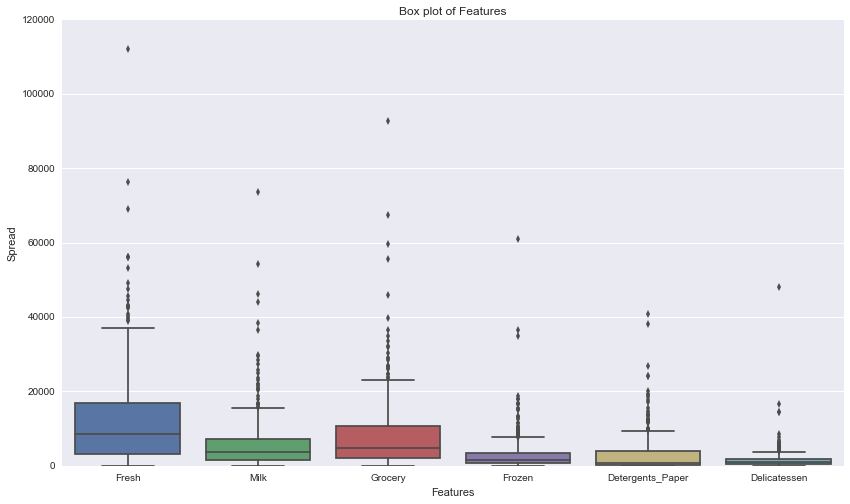

In [5]:
### Box Plot
plt.figure(figsize=FIG_SIZE)
plt.title('Box plot of Features')
plt.ylabel('Spread')
plt.xlabel('Features')
display(sns.boxplot(data[data.columns]))

Interesting. It seems that the data has a significant amount of outliers.

### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [45]:
#printing out the index of the max of each catagory.
print data.idxmax(axis=0, skipna=True)

Fresh               181
Milk                 86
Grocery              85
Frozen              325
Detergents_Paper     85
Delicatessen        183
dtype: int64


In [46]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [181,325,86]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.columns)#.reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
181,112151,29627,18148,16745,4948,8550
325,32717,16784,13626,60869,1272,5609
86,22925,73498,32114,987,20070,903


We can visualize a percentage representation of these customers spending in each catagory using the following heatmap.

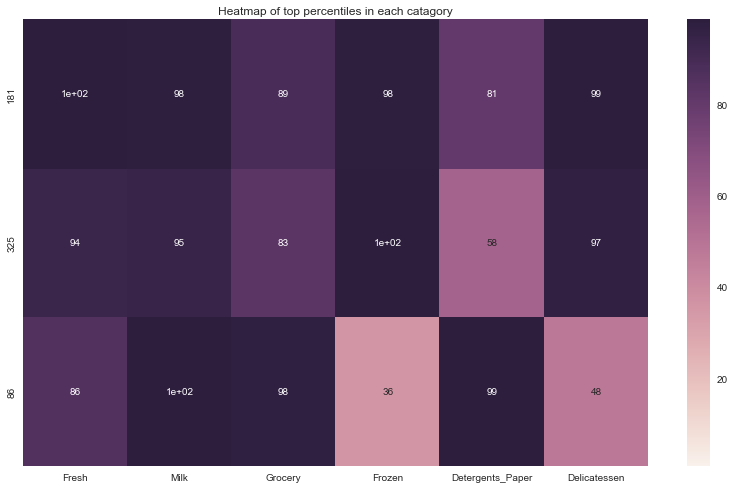

In [48]:

# First, calculate the percentile ranks of the whole dataset.
percentiles = data.rank(pct=True)
# Then, round it up, and multiply by 100
percentiles = 100*percentiles.round(decimals=3)
# Select the indices you chose from the percentiles dataframe
percentiles = percentiles.iloc[indices]
# Now, create the heat map using the seaborn library
plt.figure(figsize = FIG_SIZE)
plt.title("Heatmap of top percentiles in each catagory")
_ = sns.heatmap(percentiles, vmin=1, vmax=99, annot=True)

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**

* __Customer 181__: Customer 181 has the largest 'Fresh' value out of the dataset. It is roughly 9 standard deviations above the mean of the dataset. Its values for all of the other categories are also quite a bit higher than the mean. Since the numbers are high across the board, I would assume that this customer is a small market or convenience store that sells all categories of goods.
* __Customer 325__: This customer has a value larger than the mean in every category except 'Detergents_Paper' and the largest in the "Frozen" category. As the 'Detergents_Paper' category is lower than the mean by .25% of a standard deviation, it can still be considered a fairly average number. This makes sense, as frozen meals don't normally require a lot of cleanup. If I were to take a guess I would assume this customer provides low-cost meals to needy people.
* __Customer 86__: This customer has the largest "Milk" expense in the dataset. It is larger in the "Grocery", "Fresh" and "Detergent_Paper" categories than the mean, and smaller in the "Frozen" and "Delicatessen". This could be a cafe, as coffee needs a lot of milk, cleaning standards should be strict, and it would also sell some snacks for it's customers.  It wouldn't be expected to have a lot of frozen food.


### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

It is hypothesized that 'Detergent_Paper' might not be bought at the whole saler in many cases. The evidence that supports this hypothesis is seen by the plot below, the distribution 'Detergents_Paper' is heavily skewed to the left, meaning that most of the customers buy little, if none of the 'Detergents_Paper' catagory from the whole saler. Presumably, the customers still need stuff from the "Detergents_Paper' catagory. If this hypothesis is correct, then the other catagories should not be able to predict 'Detergent_Paper' very well as some ofthe customers buy their 'Detergent_Paper' needs at the whole saler and some do not. The metric that will be used for this determination is the R^2 score.

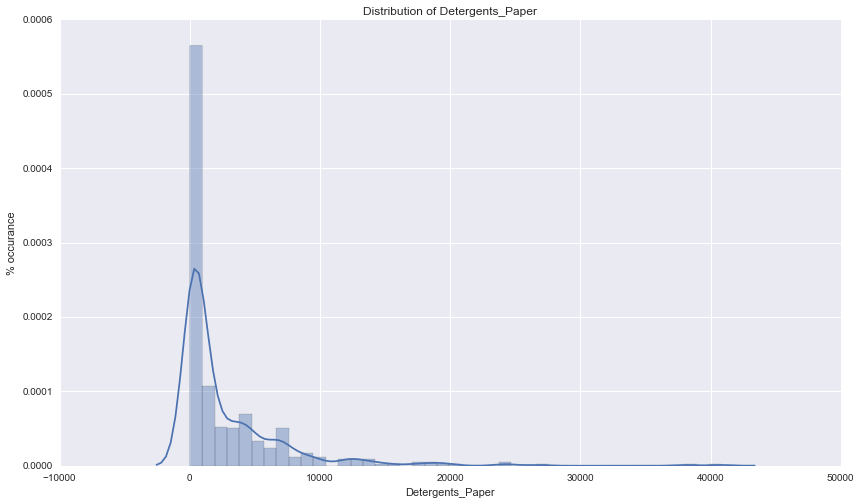

In [8]:
plt.figure(figsize=FIG_SIZE)
plt.xlabel('Detergents_Paper')
plt.title('Distribution of Detergents_Paper')
plt.ylabel('% occurance')

display(sns.distplot(data['Detergents_Paper']))

In [9]:
from sklearn.model_selection import train_test_split
from sklearn import tree
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.copy()
new_data.drop('Detergents_Paper', axis = 1, inplace = True)

# TODO: Split the data into training and testing sets using the given feature as the target
X_train, X_test, y_train, y_test = train_test_split(new_data, 
                                                    data['Detergents_Paper'], 
                                                    test_size =.25,
                                                    random_state = RAN_STATE)

regressor = tree.DecisionTreeRegressor(random_state=29)
regressor.fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
print("R^2 score is ", score)

('R^2 score is ', 0.31613917343774067)


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**

The results of our experiment seem to agree with our hypothesis. The other catagories in the experiment are not a good predictor of the 'Detergent_Paper' sale value. The resulting R^2 value of our experiment was 0.3161, meaning the features do not predict the label well.

These results should however be taken with a grain of salt. When the experiment is completed with a random_state value of 29, the R^2 value jumps up to .77. On the basis of this observation, the 'Detergent_Paper' catagory should be kept for the final experiment.

It is worth it to make a visualization to investigate this further.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

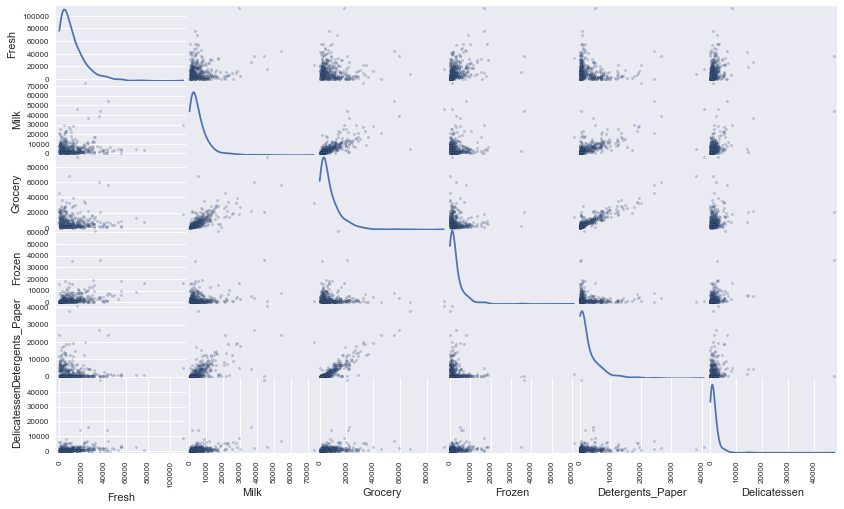

In [10]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = FIG_SIZE, diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**

From the scatterplot, we can see our original hypothesis was wrong. There is correlation between 'Detergent_Paper' and milk and groceries.

Notably, there seems to be no significant correlation between 'Delicatessen' and any other catagory. Lets repeat the experiment using 'Delicatessen' as the label.

In [11]:
new_data = data.copy()
new_data.drop('Delicatessen', axis = 1, inplace = True)

# TODO: Split the data into training and testing sets using the given feature as the target
X_train, X_test, y_train, y_test = train_test_split(new_data, 
                                                    data['Delicatessen'], 
                                                    test_size =.25,
                                                    random_state = RAN_STATE)

regressor = tree.DecisionTreeRegressor(random_state = RAN_STATE)
regressor.fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
print("R^2 score is ", score)

('R^2 score is ', -2.254711537203931)


The final score for a random_state value is -11.0083. Agreeing strongly with our hypothesis that 'Delicatessen' cannot easily be predicted by the other data, meaning it has no correlation to the other data, and would not be a good indicator of spending habits. This results is echoed through different iterations of random_state values.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

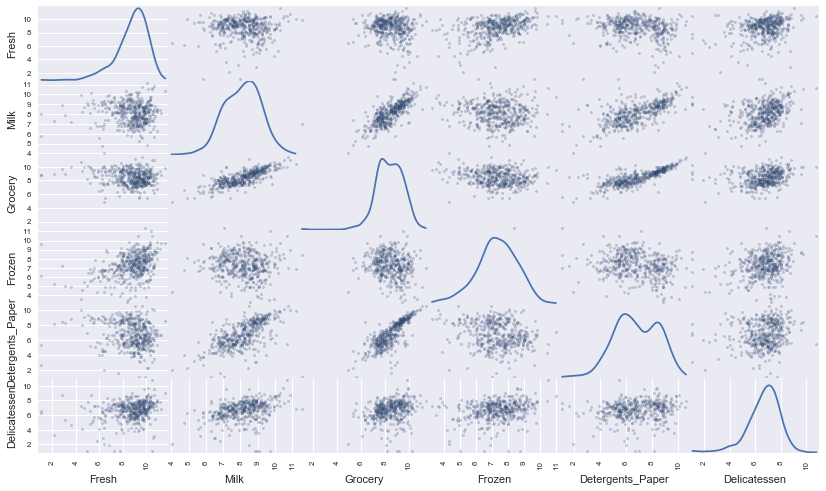

In [12]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = FIG_SIZE, diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature is much more normal. The correlations noted above between 'Milk', 'Groceries', and 'Detergents_Paper' still exist. Notably, 'Detergents_Paper' seems to have a bimodal distribution.

The code below shows how the data has changed after having the natural logarithm applied to it.

In [13]:
# Display the log-transformed sample data
print 'log_data samples:'
display(log_samples)
print 'log_data statistics:'
display(log_data.describe())

log_data samples:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
181,11.627601,10.296441,9.806316,9.725855,8.506739,9.053687
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723


log_data statistics:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,8.730544,8.121047,8.441169,7.301396,6.785972,6.665133
std,1.480071,1.081365,1.116172,1.284540,1.721020,1.310832
min,1.098612,4.007333,1.098612,3.218876,1.098612,1.098612
25%,8.048059,7.334981,7.674616,6.609678,5.548101,6.011875
50%,9.048286,8.196159,8.467057,7.330388,6.705018,6.872645
75%,9.737064,8.880480,9.273854,8.175896,8.274341,7.506728
max,11.627601,11.205013,11.437986,11.016479,10.617099,10.777768


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [14]:
all_outliers = []
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3 - Q1) * 1.5
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    outlier_points = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    display(outlier_points)
    
    for index in outlier_points.index.values:
        all_outliers.append(index)


#Find which data points are outliers on two or more features.
all_outliers, indices = np.unique(all_outliers, return_inverse=True)
counts = np.bincount(indices)
outliers_2_or_more = all_outliers[counts>1]
print 'Outliers on two or more features:', outliers_2_or_more    

# Select the indices for data points you wish to remove
outliers  = outliers_2_or_more

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


Outliers on two or more features: [ 65  66  75 128 154]


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**

The datapoints that appear as outliers in more than one feature have been removed from the dataset. Since they are so few and far between, they will not be helpful in forming clusters of customer types. 

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

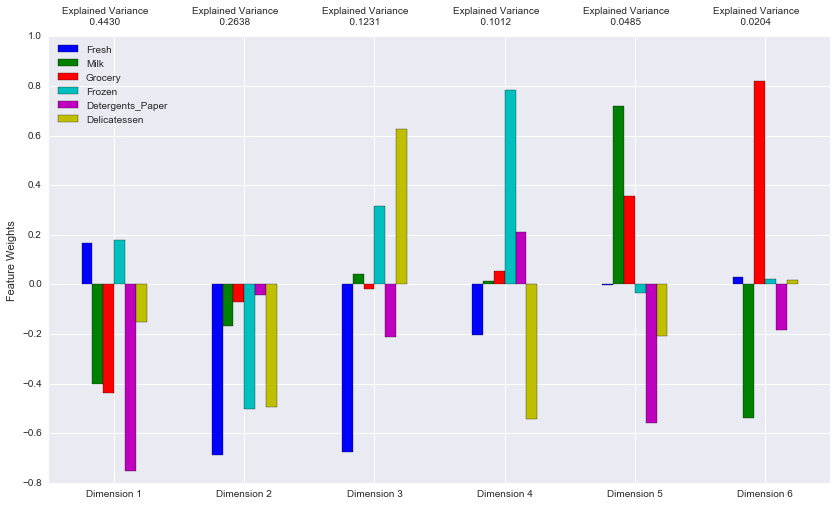

In [15]:
from sklearn.decomposition import PCA
# TODO: Apply PCA to the good data with the same number of dimensions as features
pca = PCA(n_components=6).fit(good_data)

# TODO: Apply a PCA transformation to the sample log-data
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)


### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

In [16]:
print pca_results['Explained Variance']
print '\nCumulative sum:\n',pca_results['Explained Variance'].cumsum()

Dimension 1    0.4430
Dimension 2    0.2638
Dimension 3    0.1231
Dimension 4    0.1012
Dimension 5    0.0485
Dimension 6    0.0204
Name: Explained Variance, dtype: float64

Cumulative sum:
Dimension 1    0.4430
Dimension 2    0.7068
Dimension 3    0.8299
Dimension 4    0.9311
Dimension 5    0.9796
Dimension 6    1.0000
Name: Explained Variance, dtype: float64


**Answer:**
The first principle component, can explain 44.3% of the varience in the data. The second principle component can explain 26.38%. Their cumulative sum can explain 70.68% of the variance of the data. The first four components can cumulatively explain 93.11% of the variance in the data.

In terms of customer spending, the first four dimensions could represent:
* __Dimension 1__: The first dimension shows a strong correlation with 'Milk', 'Grocery' and 'Detergent_Paper' catagories, in agreement with out previous scatterplot analysis.
* __Dimension 2__:  The second dimension shows a strong correlation with 'Fresh', 'Frozen', and 'Delicatessen' and could be considered orthogonal to Dimension 1.
* __Dimension 3__: The third dimension represents high spending in the 'Frozen', and 'Delicatessen' catagories, with low spending in the 'Fresh' catagory.
* __Dimension 4__: The forth dimension represents high 'Frozen' spending vs. low 'Delicatessen' and 'Fresh' spending.


### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [17]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-2.1899,-4.8605,0.0008,0.4827,0.5041,-0.1988
1,-0.7286,-4.2802,1.2473,1.6688,0.8004,0.1030
2,-4.2903,-1.4952,-1.4997,0.1394,1.1469,-0.6255


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [18]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

We can now visualize this dimensionality reduction and determine the cumulative sum of the explained variance.

Exaplained variance for each dimension
Dimension 1    0.4430
Dimension 2    0.2638
Name: Explained Variance, dtype: float64

Cumulative sum:
Dimension 1    0.4430
Dimension 2    0.7068
Name: Explained Variance, dtype: float64


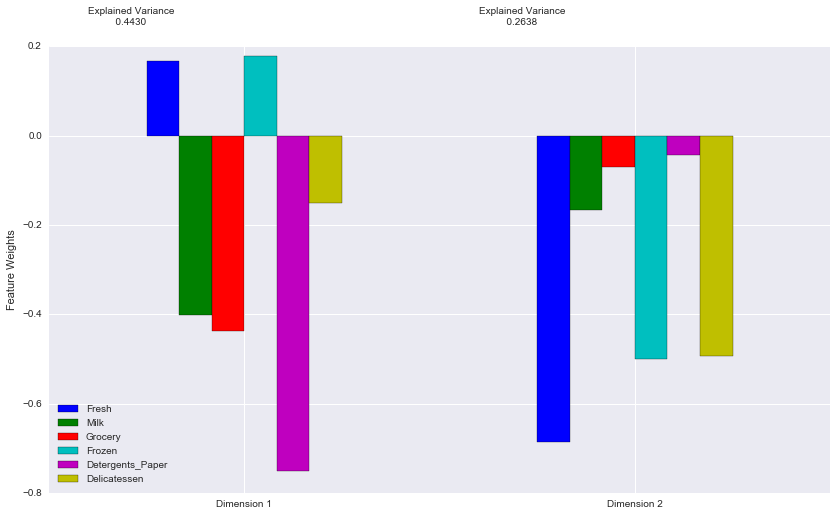

In [19]:
# Generate PCA results plot
pca_results_reduced = rs.pca_results(good_data, pca)
print 'Exaplained variance for each dimension\n',pca_results_reduced['Explained Variance']
print '\nCumulative sum:\n',pca_results_reduced['Explained Variance'].cumsum()

 The cumulative sum of the explained varience for the two dimensions is 70.68%: not a great score. Often, there is a tradeoff between the need to reduce dimensionality of the data (for training purposes), and accuracy of the model. Nevertheless, we will proceed with the analysis using two pricipal directions as this is easier to visualize. If this were a more serious analysis, I would use 4 pricipal directions, as this would explain 93.11% of the varience in the data.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [20]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-2.1899,-4.8605
1,-0.7286,-4.2802
2,-4.2903,-1.4952


## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**
A K-Means clustering algorithm allows you to classify the data points as being 100% belonging to one cluster. The Gaussian Mixture Model (GMM), or "Soft Clustering" assumes that each data point is a percentage mixture of each of the clusters. For example, this allows for points that are exactly in the middle of two clusters to be classified as 50% one category and 50% the other category.

In the context of this problem, I will use Gaussian Mixture clustering. The goal of the project is to best describe the variation in the different types of customers that a wholesale distributer interacts with, the goal being to design a delivery service to meet the needs of each customer. If a K-Means clustering algorithm is used, it might portray a false sense that there are hard definitive categories. The wholesaler might design their delivery service to cater to one type of defined customer, when in reality the customers have a more multi-dimensional need. A GMM does not make this assumption, unless it is truly portrayed by the data. 

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

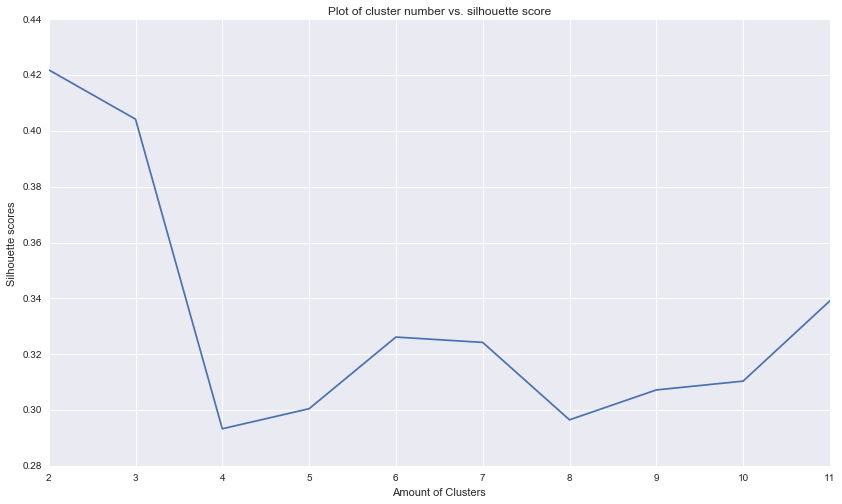

In [23]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

def score_GMM(n_clusters):
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = GaussianMixture(n_components=n_clusters, random_state = RAN_STATE).fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)
    
    # TODO: Find the cluster centers
    centers = clusterer.means_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    return score
    
# Make an array of different silhouette_scores for clusters from 2 to 10.
GMM_scores = []
for i in range(2,12):   
    GMM_scores.append(score_GMM(i))

#Plot silhouette scores for a variety of cluster numbers.
plt.figure(figsize= FIG_SIZE)
plt.plot(range(2,12),GMM_scores)
plt.xlabel('Amount of Clusters')
plt.ylabel('Silhouette scores')
plt.title('Plot of cluster number vs. silhouette score')
plt.show()


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**
As can be seen in the above visualization, the optimum amount of clusters for the dataset when reduced to 2 dimensions is 2. The silhouette score for 2 clusters is 0.4219. The next best silhouette score 0.3216 for 6 clusters. This means that there are two optimum customer segments that that whole sale distributer should be focusing on.

It should be noted that the silhoutte score is based on each of the datapoints being "hard classified", i.e the higher posterior probability of the point for each cluster is used to define the datapoint. If a wholesaler wanted to see the posterior probability distribution of each of the datapoints the `predict_proba` method would be used instead of the `predict` method. Using the `predict` method effectivly turns this into a K-Means cluster algorithm.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

In [24]:
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centers, pca_samples)

NameError: name 'preds' is not defined

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [25]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)


NameError: name 'centers' is not defined

### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

In [26]:
med_values = np.around(data.median().values)

for i, cat in enumerate(data.columns):
    print "Median values for {}: ${:.2f}".format(cat, med_values[i])


display(data.describe())

print "Centers offset from median"
display(true_centers - np.around(data.median().values))

Median values for Fresh: $8504.00
Median values for Milk: $3627.00
Median values for Grocery: $4756.00
Median values for Frozen: $1526.00
Median values for Detergents_Paper: $816.00
Median values for Delicatessen: $966.00


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Centers offset from median


NameError: name 'true_centers' is not defined

**Answer:**
The data description is repeated above for quick reference. As the mean has the tendancy to be dragged upwards by large outliers (shown in the box plot above), the median has also been calculated along with the center offset to the median of the data of each of the major segments.

Datapoints in segment 0 are characterized by customers who purchase a lot of goods from the `Fresh` and `Frozen` categories. Conversely, customers in segment 1 purchase a lot of goods from the `Milk`, `Grocery` and `Detergent_Paper` catagories. Referencing the statistical description above, customers from segment 0, on average buy less than the mean of the data in all categories, but above the median for the `Fresh` and `Frozen`. Customers from segment 1 buy, on average less then the mean in all categories except for `Groceries`, `Milk` and `Detergents_Paper`, but above the median in each of these categories.

Since we decided to split the data into two classifications, my judgement is that segment 0 represents customers who sell food to consumers to prepare themselves (e.g. grocery stores, supermarkets, etc.), and segment 1 represents customers who prepare food or coffee to serve to consumers (coffee shops, etc.).


### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [27]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

NameError: name 'sample_preds' is not defined

**Answer:**

* __Sample point 0 = Customer 181__: Our initial intuition was that this was a small market or convenience store, This is inconsistant with our new assumption that segment 1 represents customers who prepare simple food or coffee to serve to consumers

* __Sample point 1 = Customer 325__: Our initial intuition was that this customer provides low-cost meals to needy people. This is consistant with our new assumption that segment 0 represents customers who sell food to consumers to prepare themselves.

* __Sample point 2 = Customer 86__: Our initial intuition was that this point was a cafe. This is consistant with our new assumption that segment 1 represents customers who prepare simple food or coffee to serve to consumers.



## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

As the customers from segment 0 represent customers that sell food to consumers to prepare themselves (i.e supermarkets, retailers), and are most likely to keep a good stock of food on hand, they would be the most likely candidate to have delivery 3 days a week instead of 5. The customers from segment 1 represent cafes and restaurants, and are more likely to need a delivery in an emergency situation. Thus, the customers from segment 1 are more likely to need food delivered 5 days a week and should not be selected to have their delivery service changed.

In order to test this intuition, an A/B test could be performed as follows: a small sample from each customer segment could be selected for the delivery frequency change. The remaining members of each cluster would be the control group. Satisfaction surveys from each of the groups in each segment could be used to determine the effect of the delivery schedule change on each of the customer segments.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

Using the result that we have generated in our clustering analysis, we can make a model that will classify new customers as part of "customer segment 1", or "customer segment 2". This would be done by using the existing estimated product spending categories as a features, and the generated customer segment as a labels, for training input to a supervised learning algorithm. The new customer's estimated product spending in each of the categories could then be fed into this trained algorithm to produce predictions on which customer segment the new customer would belong to.



### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

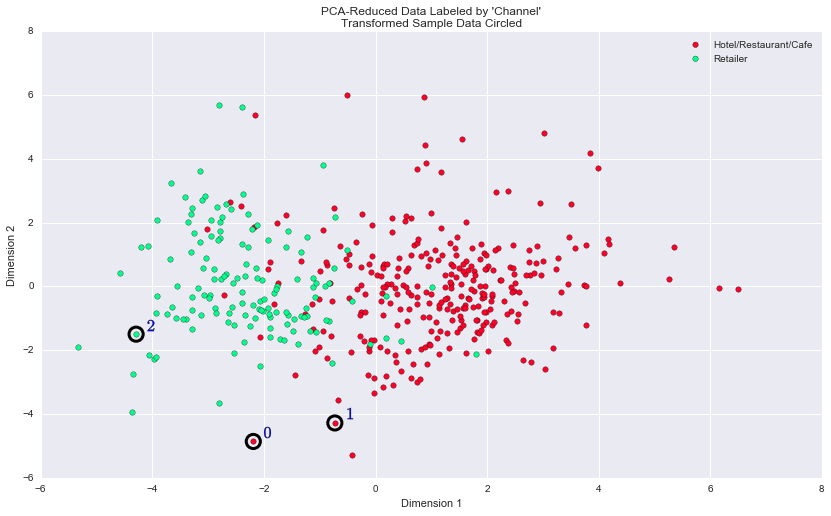

In [28]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**

Our clustering algorithm assumed that there were two customer categories being 'markets' and 'restaurantes' and 'cafes'. This is fairly consistent with the two different customer 'Channels' revealed by the underlying data. The majority of the points agree between our algorithm, and the hidden labels. However, there are a significant amount of points that are inconsistent. These points should perhaps not be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by our clustering algorithm but should instead be recognized as a mixture of the two as discussed in the Guassian Mixed model clustering section of this report. Ideally, the whole sale distributer should choose a threshold probability value for each of the datapoints pertainance to each segment (e.g. 80% segment 0 and 20% segment 1), before they decide to change the delivery frequency to the particular customer.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.